In [1]:
import TechCore.SimulatorVolume.simulator as simulator
import TechCore.Simulator.simulator_optimized as midprice_simulator

from TechCore.Strategies.HW_7 import Stoikov_2
from TechCore.Strategies import Midprice

import TechCore.SimulatorVolume.get_info as get_info
import TechCore.SimulatorVolume.load_data as load_data
import TechCore.Simulator.load_data as midprice_load_data

from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../TechCore/data/md/btcusdt_Binance_LinearPerpetual/'

In [2]:
run_time = pd.Timedelta(10, 'm').delta
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)

In [3]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta
delay = pd.Timedelta(0.1, 's').delta

In [4]:
reload(simulator)

reload(Stoikov_2)

reload(get_info)
reload(load_data)

<module 'TechCore.SimulatorVolume.load_data' from 'C:\\Users\\artem\\.Computer Science\\CMF\\Projects\\High_Frequency_Market_Making\\TechCore\\SimulatorVolume\\load_data.py'>

In [5]:
def run_Stoikov_2(gamma):
    reload(simulator)
    reload(Stoikov_2)
    reload(get_info)
    reload(load_data)

    sim = simulator.Sim(md, latency, md_latency)

    strat = Stoikov_2.Strategy(
        delay=delay,
        future_timestamp=10**9, #ns
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return [strat.logs, strat.cheat_logs, [strat.Q, strat.R, strat.T]]

In [6]:
def run_Midprice(gamma):
    md = midprice_load_data.load_md_from_file(path=path_to_file, run_time=run_time)
    reload(midprice_simulator)
    reload(Midprice)
    reload(get_info)
    reload(load_data)

    sim = midprice_simulator.Sim(md, latency, md_latency)

    strat = Midprice.Strategy(
        delay=delay,
        risk_koef=gamma,
        time_oi=60*10**9,
        avg_sum_oi=800,
        avg_time_oi=57471412238,
        order_fees=-0.00001,
        avg_volatility=25,
        min_asset_value=0.001,
        volatility_record_cooldown=0.1*10**9, #ns
        volatility_horizon=1000,
        order_intensity_min_samples=100
    )
    strat.run(sim)
    return strat.logs

In [7]:
logs_mp = run_Midprice(0.1)

In [8]:
logs, cheat_logs, matrices = run_Stoikov_2(0.1)

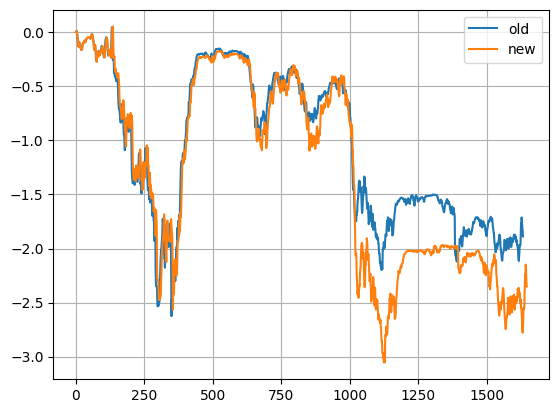

In [30]:
plt.plot(logs_mp['pnl_with_liq'], label='old')
plt.plot(logs['pnl_with_liq'], label='new')
plt.legend()
plt.grid()
plt.show()